In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.style.use('/Users/thepoetoftwilight/Documents/CUBS/Code/science.mplstyle')

Load in archival HIRES data

In [4]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/HIRES/'

In [5]:
fits_data = fits.open(rootdir + 'PG1522+101_HIRES.fits')

In [6]:
fits_data.info()

Filename: /Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/HIRES/PG1522+101_HIRES.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     30   155487R x 11C   [D, D, D, D, D, D, D, D, D, K, D]   


In [7]:
spec_data = pd.DataFrame(fits_data[1].data).to_numpy()

In [8]:
wav = spec_data[:,0]
flux_norm = spec_data[:,1]
err_norm = spec_data[:,2]

Text(0, 0.5, 'Flux (continuum normalized)')

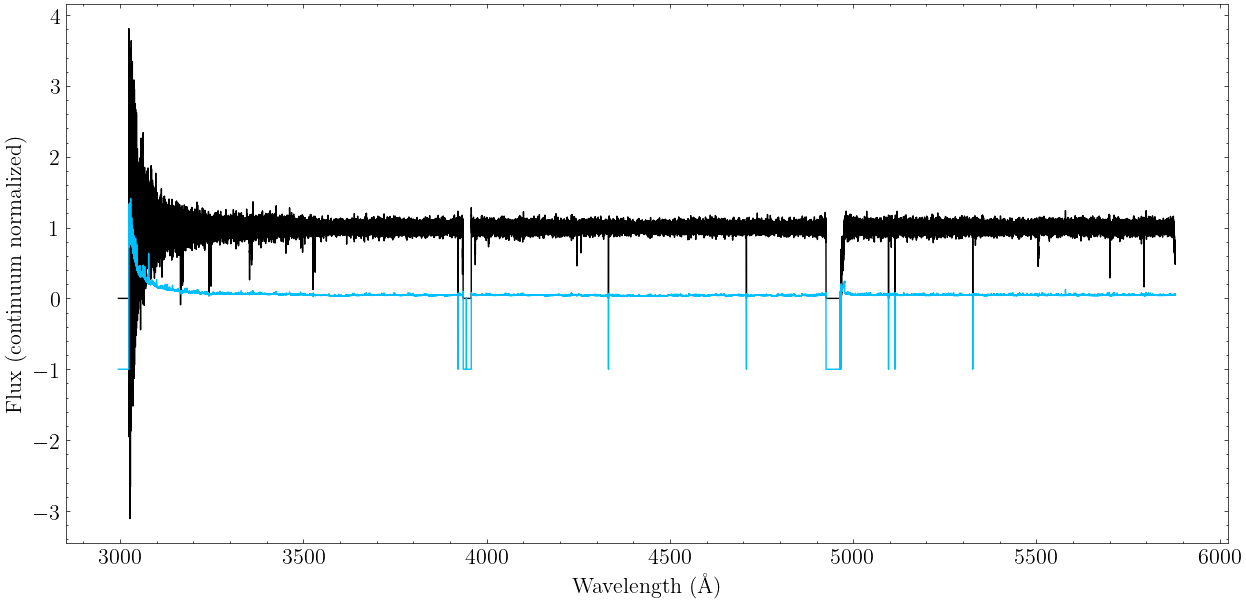

In [9]:
fig, ax = plt.subplots(1, figsize=(15,7))

ax.plot(wav[10:], flux_norm[10:])
ax.plot(wav[10:], err_norm[10:])

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Flux (continuum normalized)')

In [9]:
c_iv_rest = np.array([1548.19, 1550.77])

In [10]:
z_abs = 1.27768

In [11]:
c_iv_obs = c_iv_rest*(1+z_abs)

In [12]:
c = 3*10**5

In [13]:
velo_dict = {}

In [14]:
for i in range(len(c_iv_obs)):
    
    if(i==0):
        name = 'CIV 1548'
    else:
        name = 'CIV 1550'

    wav_0 = c_iv_obs[i]
    del_wav = wav-wav_0
    v = c*del_wav/wav_0

    plot_idx = (v>-250) & (v<250)
    
    velo_dict[name] = np.array([v[plot_idx], flux_norm[plot_idx], err_norm[plot_idx]])

Load in COS FUV data

In [15]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/FUV/'

In [16]:
spec = fits.open(rootdir + 'PG1522+101_FUV_wavecal_new.fits')
nodes = fits.open(rootdir + 'PG1522+101_FUV_wavecal_new_nodes.fits')
ids = fits.open(rootdir + 'PG1522+101_FUV_wavecal_new_identifications.fits')

In [17]:
spec_arr = pd.DataFrame(spec[1].data).to_numpy()

wav = spec_arr[:,0]
flux = spec_arr[:,1]
err = spec_arr[:,2]

In [18]:
wav[0], wav[-1]

(1152.0555139440573, 1801.6095251280458)

Load in the continuum nodes

In [19]:
cont_arr = pd.DataFrame(nodes[1].data).to_numpy()

cont_wav = cont_arr[:,0]
cont_flux = cont_arr[:,1]

Delete any continuum values that are exactly zero

In [20]:
cont_idx = cont_flux!=0

cont_wav = cont_wav[cont_idx]
cont_flux = cont_flux[cont_idx]

In [21]:
cont_flux_interp = np.interp(wav, cont_wav, cont_flux)

Continuum normalize the flux and error

In [22]:
flux_norm = flux/cont_flux_interp
err_norm = err/cont_flux_interp

Grab line identifications

In [23]:
ids_arr = pd.DataFrame(ids[1].data).to_numpy()

Grab system 121 ($z_{abs} = 1.27768$)

In [24]:
sys_idx = 121

In [25]:
sys_idx_arr = np.float_(ids_arr[:,2])

In [26]:
idx_arr = np.where(sys_idx_arr==sys_idx)[0]

In [27]:
idx_arr = idx_arr[-5:-1]

In [28]:
for idx in idx_arr:
    print(ids_arr[idx])

['OIV' True 121 608.398 1.27782 0.0 1385.82113236 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0.067 0 0]
['OIV' True 121 554.076 1.27782 0.0 1262.0853943200002 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0.224 0 0]
['NeVIII' True 121 780.323974609375 1.27782 0.0 1777.4375558447266 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1 0.05050000175833702 0 0]
['NeVIII' True 121 770.409 1.27782 0.0 1754.85302838 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0.103 0 0]


In [29]:
for i in range(len(idx_arr)):

    idx = idx_arr[i]
    
    name = ids_arr[idx][0] + ' ' + str(int(ids_arr[idx][3]))

    wav_0 = ids_arr[idx][3]*(1+z_abs)
    del_wav = wav-wav_0
    v = c*del_wav/wav_0

    plot_idx = (v>-250) & (v<250)

    velo_dict[name] = np.array([v[plot_idx], flux_norm[plot_idx], err_norm[plot_idx]])

Load in STIS data

In [30]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/STIS/'

In [31]:
spec = fits.open(rootdir + 'PG1522+101_E230M_new.fits')
nodes = fits.open(rootdir + 'PG1522+101_E230M_new_nodes.fits')
ids = fits.open(rootdir + 'PG1522+101_E230M_new_identifications.fits')

In [32]:
spec_arr = pd.DataFrame(spec[1].data).to_numpy()

wav = spec_arr[:,0]
flux = spec_arr[:,1]
err = spec_arr[:,2]

In [33]:
wav[0], wav[-1]

(1984.7520809530972, 2782.2135070721843)

Load in the continuum nodes

In [34]:
cont_arr = pd.DataFrame(nodes[1].data).to_numpy()

cont_wav = cont_arr[:,0]
cont_flux = cont_arr[:,1]

Delete any continuum values that are exactly zero

In [35]:
cont_idx = cont_flux!=0

cont_wav = cont_wav[cont_idx]
cont_flux = cont_flux[cont_idx]

In [36]:
cont_flux_interp = np.interp(wav, cont_wav, cont_flux)

Continuum normalize the flux and error

In [37]:
flux_norm = flux/cont_flux_interp
err_norm = err/cont_flux_interp

Grab line identifications

In [38]:
ids_arr = pd.DataFrame(ids[1].data).to_numpy()

Grab system 32 ($z_{abs} = 1.27768$)

In [39]:
sys_idx = 32

In [40]:
sys_idx_arr = np.float_(ids_arr[:,2])

In [41]:
idx_arr = np.where(sys_idx_arr==sys_idx)[0]

In [42]:
idx_arr = idx_arr[[0,3]]

In [43]:
for idx in idx_arr:
    print(ids_arr[idx])

['OVI' True 32 1037.61669921875 1.2778 0.0 2363.483317480469 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0.06609000265598297 0 1]
['OVI' True 32 1031.9261 1.2778 0.0 2350.52127058 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0.1325 0 0]


In [44]:
for i in range(len(idx_arr)):

    idx = idx_arr[i]
    
    name = ids_arr[idx][0] + ' ' + str(int(ids_arr[idx][3]))

    wav_0 = ids_arr[idx][3]*(1+z_abs)
    del_wav = wav-wav_0
    v = c*del_wav/wav_0

    plot_idx = (v>-250) & (v<250)

    velo_dict[name] = np.array([v[plot_idx], flux_norm[plot_idx], err_norm[plot_idx]])

Make the stack plots

In [45]:
lines = list(velo_dict.keys())

In [46]:
lines

['CIV 1548',
 'CIV 1550',
 'OIV 608',
 'OIV 554',
 'NeVIII 780',
 'NeVIII 770',
 'OVI 1037',
 'OVI 1031']

In [47]:
lines = ['CIV 1548','OIV 554','OVI 1031','NeVIII 770','CIV 1550','OIV 608','OVI 1037','NeVIII 780']

In [48]:
plt.style.use('/Users/thepoetoftwilight/Documents/CUBS/Code/science.mplstyle')

In [49]:
plt.rcParams.update({'font.size': 15})

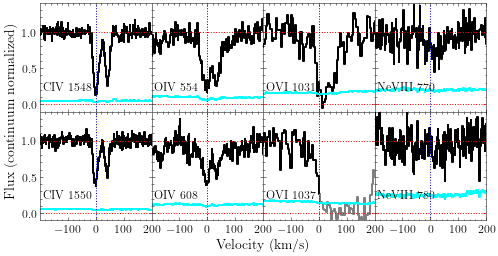

In [50]:
fig, axes = plt.subplots(2, 4, figsize=(8, 4), sharex=True, sharey=True)

for i in range(len(lines)):

    line = lines[i]
    
    v = velo_dict[line][0]
    flux_norm = velo_dict[line][1]
    err_norm = velo_dict[line][2]
    
    ax = axes[i//4, i%4]
    
    if(line == 'OVI 1037'):
        ax.step(v[:len(v)//2+1], flux_norm[:len(v)//2+1], where='mid', lw=2)
        ax.step(v[len(v)//2:], flux_norm[len(v)//2:], where='mid', lw=2, color='gray')
    else:
        ax.step(v, flux_norm, where='mid', lw=2)
        
    ax.step(v, err_norm, color='cyan', where='mid', lw=2)

    ax.axhline(0, color='red', linestyle=':')
    ax.axhline(1, color='red', linestyle=':')

    ax.axvline(0, color='blue', linestyle=':')

    ax.text(-190, .2, line, fontsize=12)

    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    
    ax.set_xticks([-200,-100,0,100,200])
    
    ax.set_xlim(-199,200)
    ax.set_ylim(-.1,1.4)
    
axes[1,2].set_xlabel('Velocity (km/s)', position=(0,1))
axes[1,0].set_ylabel('Flux (continuum normalized)', position=(0,1))

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('PG1522+101.pdf')